.

# **🚢 Titanic: Machine Learning from Disaster**

# **1️⃣ Problem Overview**

The objective of this project is to predict whether a passenger survived the Titanic disaster using machine learning.
This is a binary classification problem where:

1 → Survived

0 → Did not survive

# **2️⃣ Import Required Libraries**

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


# **3️⃣ Load the Dataset**

In [3]:
train = pd.read_csv("/content/train.csv")
train


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
test = pd.read_csv("test.csv")
test


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [5]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
train.tail()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# **🔍 Observation**

The target column Survived is present only in train.csv

Some columns like Age, Cabin, Embarked contain missing values

# **## 📊4️⃣ Exploratory Data Analysis (EDA)**

# **🔹 4.1 Survival Distribution**

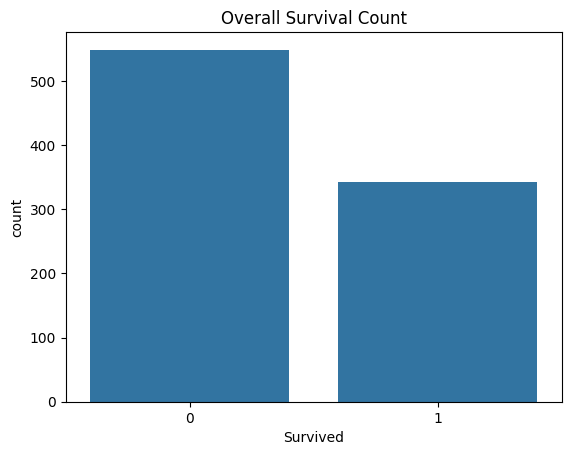

In [8]:
sns.countplot(x="Survived", data=train)
plt.title("Overall Survival Count")
plt.show()


# **📌 Explanation**

More passengers did not survive than survived

This indicates a slightly imbalanced dataset

# **🔹 4.2 Survival Based on Gender**

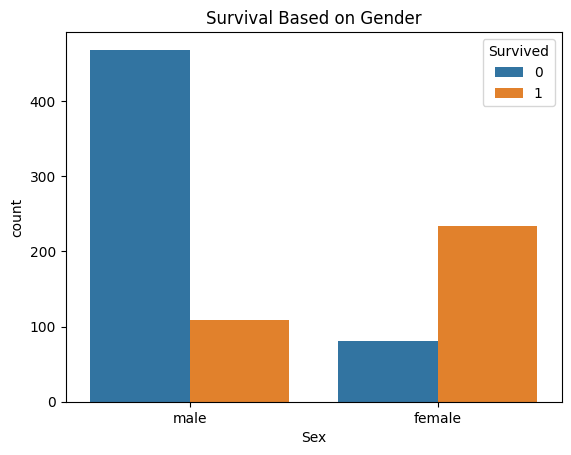

In [9]:
sns.countplot(x="Sex", hue="Survived", data=train)
plt.title("Survival Based on Gender")
plt.show()


# **📌 Explanation**

Females had a much higher survival rate

This confirms the “Women and children first” rule

Gender is a very important feature

## **🔹 4.3 Survival Based on Passenger Class**

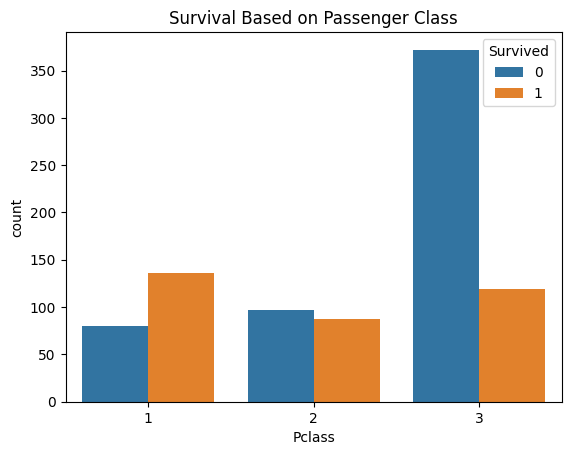

In [10]:
sns.countplot(x="Pclass", hue="Survived", data=train)
plt.title("Survival Based on Passenger Class")
plt.show()



# **📌 Explanation**

1st class passengers had the highest survival rate

3rd class passengers had the lowest

Socio-economic status played a major role in survival



# **🔹 4.4 Age Distribution of Passengers**

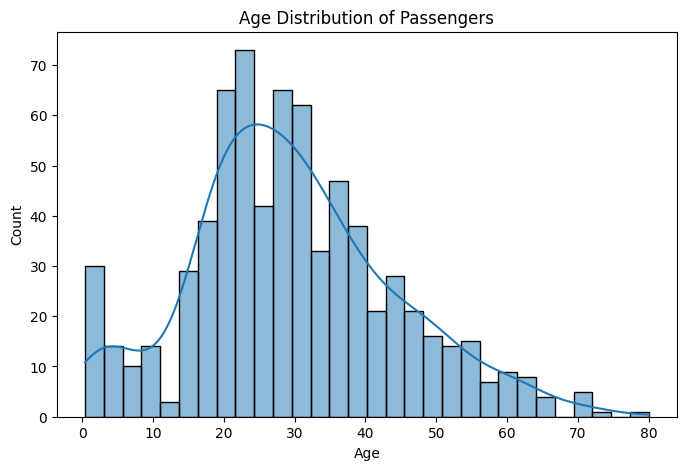

In [11]:
plt.figure(figsize=(8,5))
sns.histplot(train["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


# **📌 Explanation**

Most passengers were between 20 and 40 years old

Age has missing values and needs preprocessing

Age may influence survival probability

# **🔹 4.5 Age vs Survival**

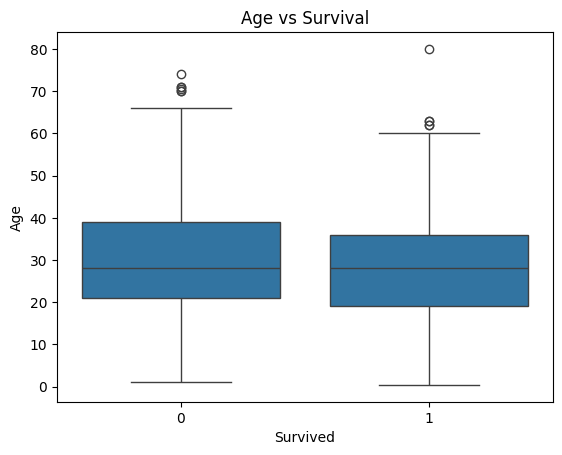

In [12]:
sns.boxplot(x="Survived", y="Age", data=train)
plt.title("Age vs Survival")
plt.show()


# **📌 Explanation**

Younger passengers (children) had better survival chances

Older passengers were less likely to survive

# **🔹 4.6 Fare vs Survival**

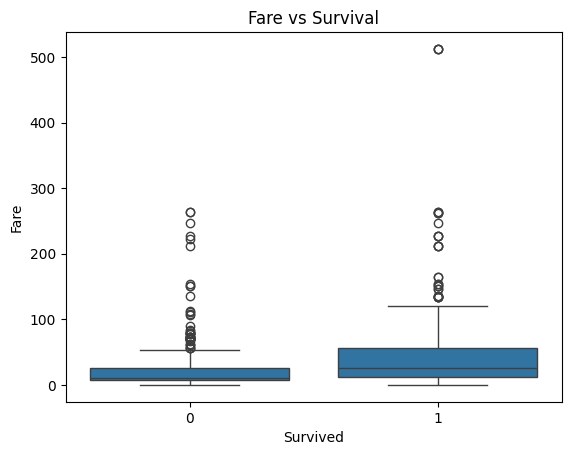

In [13]:
sns.boxplot(x="Survived", y="Fare", data=train)
plt.title("Fare vs Survival")
plt.show()



**📌 Explanation**

Passengers who paid higher fares survived more

Fare indirectly reflects passenger class and comfort level



# 🧹 5️⃣ Data Cleaning & Preprocessing

# **Handle Missing Values**

Median is robust against outliers

Mode is best for categorical values

In [ ]:
train["Age"].fillna(train["Age"].median(), inplace=True)
test["Age"].fillna(test["Age"].median(), inplace=True)

test["Fare"].fillna(test["Fare"].median(), inplace=True)

train["Embarked"].fillna(train["Embarked"].mode()[0], inplace=True)


# **Encode Categorical Variables**

Machine learning models cannot understand text, so we convert categories into numbers.

In [15]:
le = LabelEncoder()

train["Sex"] = le.fit_transform(train["Sex"])
test["Sex"] = le.transform(test["Sex"])

train["Embarked"] = le.fit_transform(train["Embarked"])
test["Embarked"] = le.transform(test["Embarked"])


# **🧠 6️⃣ Feature Selection**

In [16]:
features = ["Pclass", "Sex", "Age", "SibSp", "Parch", "Fare", "Embarked"]

X = train[features]
y = train["Survived"]
X_test = test[features]


# **✂️ 7️⃣ Train–Validation Split**

In [17]:
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# **🌲 8️⃣ Model Training (Random Forest)**

In [18]:
model = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

model.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

# **📈 9️⃣ Model Evaluation**

In [19]:
y_pred = model.predict(X_val)
accuracy = accuracy_score(y_val, y_pred)

print("Model Accuracy:", accuracy)


Model Accuracy: 0.8212290502793296




# **📦 🔟 Final Prediction on Test Data**

In [20]:
test_predictions = model.predict(X_test)


**Submission**

In [21]:
submission = pd.DataFrame({
    "PassengerId": test["PassengerId"],
    "Survived": test_predictions
})

submission.to_csv("submission.csv", index=False)
